# Libraries

In [7]:
from config import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ipywidgets import interact

if COLAB:
  # mouting drive content in session on colab
  mountDrive()

# Setup

In [8]:
FOLDER = PATH_RES/'Results_Paper_PCNN' #'Classification_02_24h_SC25_Paper_CV5_CV05_2023_11_06__0'

sortingMtc = 'val_tss'

useBestCrossEpochForCV = True

epochLim = None

plotByNumInst = False
if plotByNumInst:
  xaxisID = 'num_train_inst'
else:
  xaxisID = 'epoch'

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,8)

# Load CV Results

In [9]:
best = pd.read_csv(FOLDER/'bests.csv').sort_values(by=[sortingMtc],ascending=False)
bestCvCrEpcPath = FOLDER/'bestsCVCrossEpoch.csv'
HAS_CV = False
bestCVCrossEpoch =  None
if bestCvCrEpcPath.exists():
  bestCVCrossEpoch = pd.read_csv(bestCvCrEpcPath).sort_values(by=[sortingMtc],ascending=False)
  HAS_CV = True

list_metrics = [col for col in list(best.columns) if (col != 'model' and col[0:2]!='va' and col[-2:] not in ['pc','td','in','ax','st'])]
list_metrics_vals = [f'val_{col}' for col in list_metrics]

models = list(best['model'])

res = {}
for model in models:
  if epochLim is not None:
    res[model] =  pd.read_csv((FOLDER/f'training_{model}.csv').as_posix()).loc[0:epochLim]
  else:
    res[model] =  pd.read_csv((FOLDER/f'training_{model}.csv').as_posix())
  
# normalisation of the xaxis for model with different number of trained instances
if plotByNumInst:
  # axis calculation
  xaxis = []
  for model in models:
    xaxis = xaxis + list(res[model][xaxisID].values)
  xaxis = sorted(set(xaxis))
  # rows insertions
  complementaryRows = {num_inst : dict(**{col : np.nan for col in res[models[0]].columns if col != xaxisID}, **{xaxisID:num_inst}) for num_inst in xaxis}
  for model in models:
    for num_inst in xaxis:
      if num_inst not in res[model][xaxisID].values:
        res[model] = res[model].append(complementaryRows[num_inst], ignore_index=True)
    res[model].sort_values(by=[xaxisID], ascending=True, inplace=True, ignore_index=True)
    res[model].set_index(xaxisID ,inplace=True)

    
  # Interpolation
    res[model].interpolate(method='index', axis=0, limit_direction='forward', inplace = True)
    res[model]['epoch'] = res[model]['epoch'].fillna(np.max(res[model]['epoch'].fillna(-1))) # useless?
    res[model].reset_index(inplace=True)
    res[model][xaxisID] = res[model][xaxisID].astype('int64')
    res[model] = res[model].set_index(xaxisID)

In [10]:
viz_metrics = [
 'val_acc',
 'val_tss',
 'val_hss',
 'val_mcc',
 'val_f1',
 'val_recall',
 'val_precision',
 'val_auc_roc',
 'val_auc_pr',
 'val_far',
 'val_TP',
 'val_FN',
 'val_TN',
 'val_FP',
 'val_loss']

In [11]:
display(best[['model']+viz_metrics])#[:10]

,model,val_acc,val_tss,val_hss,val_mcc,val_f1,val_recall,val_precision,val_auc_roc,val_auc_pr,val_far,val_TP,val_FN,val_TN,val_FP,val_loss
0,C+_mpf_Persistant_24,0.855476,0.711644,0.710670,0.712630,0.850302,0.863389,0.839748,0.855476,0.824203,0.160252,6.603200,1.044800,7.073600,1.265600,2.216581
1,C+_mpf_PTx8_RtdXall_ProgPos_AW1e5D1e4_0193x021...,0.831957,0.667164,0.664497,0.667742,0.830615,0.998923,0.824290,0.881874,0.867462,0.175710,7.575683,1.464139,7.014707,8.198824,0.505569
2,C+_mpf_FD_RtdX3_ProgPos_AW1e3D1e4_0193x0211x00...,0.819638,0.644850,0.640513,0.651262,0.821233,0.886390,0.817736,0.887655,0.874323,0.182264,6.721611,2.438980,7.097166,2.139752,0.456626
3,C+_mpf_FD_RtdX3_ProgPos_AW1e3D1e4_blos_24,0.814675,0.633987,0.630527,0.641935,0.815592,0.906677,0.806816,0.881170,0.863841,0.193184,6.935607,2.075481,6.773399,3.349862,0.511386
4,C+_mpf_FD_Ptrd_ProgPos_Am1e3_blos_24,0.814824,0.631854,0.629732,0.640004,0.808082,0.861209,0.813443,0.880879,0.864722,0.186557,6.587406,1.710697,6.888250,2.081647,0.466140
5,C+_mpf_PTx8_RtdXall_ProgPos_AW4e6D4e3_blos_24,0.808280,0.618567,0.616787,0.619483,0.807860,0.996592,0.796374,0.857171,0.837296,0.203626,7.628158,1.523876,6.733831,8.274041,0.554460
6,C+_mpf_FD_Ptrd_ProgPos_AW2e4D4e3_blos_24,0.805014,0.618311,0.612748,0.627544,0.816894,0.999789,0.742499,0.822825,0.799143,0.257501,7.652782,1.236218,5.907249,8.170463,1.197560
7,C+_mpf_PTx8_RtdXall_ProgPos_AW1e5D1e4_b_blos_24,0.804033,0.612769,0.609459,0.616551,0.807455,0.998940,0.793824,0.862184,0.850068,0.206176,7.646317,2.108957,6.723516,8.133246,0.510123
8,C+_mpf_PTx8xIntrPtc_RtdXall_ProgPos_AW1e5D4e3_...,0.805088,0.610745,0.609826,0.613399,0.797040,0.993460,0.814874,0.869594,0.856606,0.185126,7.604171,1.950324,6.998778,7.670587,0.503593
9,C+_mpf_PTx8_RtdXall_ProgPos_AW2e5D4e3_blos_24,0.801443,0.604129,0.602793,0.607066,0.798384,0.949040,0.808209,0.857930,0.844988,0.191791,7.263010,2.089870,6.960348,5.541957,0.517608


In [12]:
if bestCVCrossEpoch is not None:
  display(bestCVCrossEpoch[['model']+viz_metrics])#[:10])

,model,val_acc,val_tss,val_hss,val_mcc,val_f1,val_recall,val_precision,val_auc_roc,val_auc_pr,val_far,val_TP,val_FN,val_TN,val_FP,val_loss
0,C+_mpf_Persistant_24,0.855476,0.711644,0.710670,0.712630,0.850302,0.863389,0.839748,0.855476,0.824203,0.160252,6.603200,1.044800,7.073600,1.265600,2.216581
1,C+_mpf_PTx8_RtdXall_ProgPos_AW1e5D1e4_0193x021...,0.839091,0.678765,0.677734,0.680044,0.835295,0.999351,0.844828,0.887416,0.874735,0.155172,7.578935,1.963036,7.274175,8.211728,0.483662
2,C+_mpf_FD_RtdX3_ProgPos_AW1e3D1e4_0193x0211x00...,0.831113,0.664300,0.662229,0.666225,0.827938,0.936934,0.878831,0.900507,0.890711,0.121169,7.104208,3.652538,7.700049,3.031823,0.416582
3,C+_mpf_FD_RtdX3_ProgPos_AW1e3D1e4_blos_24,0.825781,0.653238,0.651596,0.657489,0.825506,0.944369,0.870257,0.896163,0.884503,0.129743,7.226055,3.130447,7.540879,4.080929,0.427553
4,C+_mpf_FD_Ptrd_ProgPos_Am1e3_blos_24,0.820998,0.644902,0.642291,0.650854,0.818120,0.883618,0.843921,0.894921,0.883011,0.156079,6.758348,2.259435,7.265014,2.208432,0.413778
5,C+_mpf_FD_Ptrd_ProgPos_AW2e4D4e3_blos_24,0.815476,0.638544,0.633304,0.646475,0.825830,1.000000,0.834047,0.853499,0.834758,0.165953,7.654395,2.461020,7.023746,8.313501,0.610849
6,C+_mpf_PTx8xIntrPtc_RtdXall_ProgPos_AW1e5D4e3_...,0.817590,0.636188,0.634816,0.637540,0.816333,0.993460,0.847477,0.878382,0.868979,0.152523,7.604171,2.967964,7.430036,7.670587,0.476067
7,C+_mpf_PTx8_RtdXall_ProgPos_AW2e5D4e3_blos_24,0.816603,0.635458,0.633586,0.635435,0.815586,0.949040,0.854732,0.872989,0.861057,0.145268,7.263010,2.709499,7.401118,5.541957,0.496523
8,C+_mpf_PTx8_RtdXall_ProgPos_AW4e6D4e3_blos_24,0.815175,0.632319,0.630627,0.632088,0.815371,0.998069,0.815554,0.861551,0.844087,0.184446,7.639462,1.895121,6.992570,8.288675,0.539548
9,C+_mpf_PTx8_RtdXall_ProgPos_AW1e5D1e4_b_blos_24,0.812844,0.628496,0.626264,0.629126,0.813312,0.998940,0.812031,0.864575,0.852916,0.187969,7.646317,2.636769,7.068099,8.134872,0.501967


# Best Epoch - Comparisons

## Standard

For C+_EUV ; C+_Blos ; and M+_EUV we select the best cross-epoch model (c.f. next plot)  
The M+_Blos was harder to tune and many of the tried parameters lead to similar performances.  
We select the M+_mpf_PTx8_RtdXall_LowC_AW6e6D1e3_blos_24 model.  
It is not the one with the best TSS but it is close to the best one with a better HSS and MCC than most and smoother learning curves.  
The smoother learning curves in particular might indicate a better generalisation ability (validation performance less likely to be attributed to random luck) 

Text(0.5, 0.94, 'Models : PCNN - FD -  Peristent\n(err=std)')

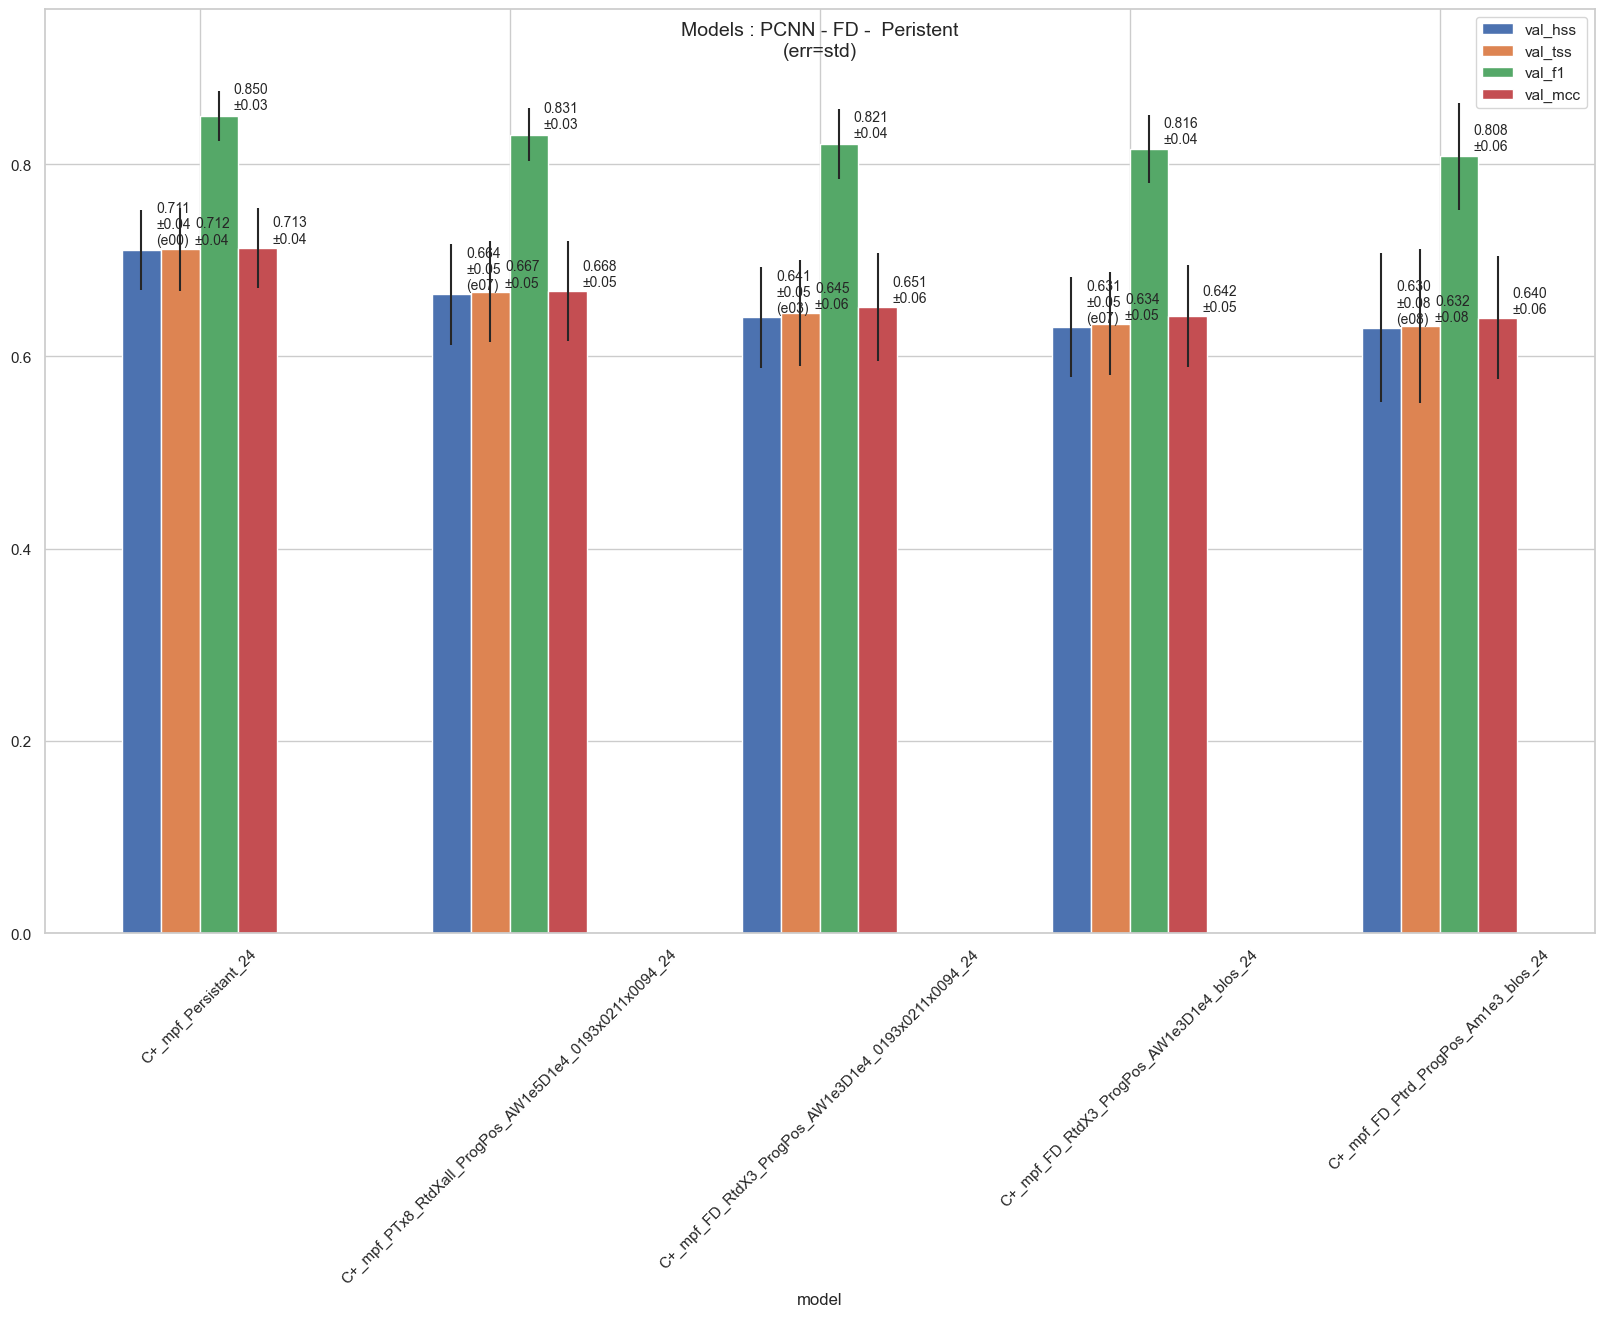

In [37]:
types    = ['C+']#, 'M+', 'X+'] # ['C+', 'M+', 'X+']
hasCV    = HAS_CV
metrics  = ['val_hss','val_tss', 'val_f1', 'val_mcc'] # ['val_tss','val_far']
pltBest  = [True     , False   , False   , False]
err_type = 'std' # 'std' , 'minmax'
kind     = "bar"
num_top  = 5
archis   = 'PCNN - FD -  Peristent'


tmp = best.copy()
for i in range(len(tmp)):
  name_elems = tmp.loc[i]['model'].split('_')
  # if len(name_elems) > 2:
  #   best.loc[i,'model'] = f'{name_elems[0]}_{name_elems[1]}\n{name_elems[2]}'

tmp['type'] = tmp['model'].apply(lambda x: x[:2])
tmp = tmp[tmp['type'].isin(types)]
if num_top is None: num_top = len(tmp)
tmp = tmp[0:num_top]
sub_models = tmp['model'].values

if not hasCV:
  yerr=None
else:
  if err_type == 'minmax': err_type = ('min','max')
  if type(err_type) in [tuple,list]:
    yerr=[[tmp[metrics[i]+'_'+err_type[0]]-tmp[metrics[i]],tmp[metrics[i]]+'_'+err_type[1]]-tmp[metrics[i]] for i in range(len(metrics))]
    yerr = np.abs(yerr)
  else:
    yerr=[tmp[metrics[i]+'_'+err_type] for i in range(len(metrics))]
    # best[metrics[0]+'_'+err_type], best[metrics[1]+'_'+err_type]

tmp.set_index('model',inplace=True)
ax = tmp[metrics].\
        plot(kind=kind,figsize=(20, 12),yerr=yerr)

refEpochs = {}
for idx,p in enumerate(ax.patches):
  #print(f'{idx: >2} : {p.get_height():.2f}')
  mtcIdx = idx // len(sub_models)
  modIdx = idx % len(sub_models)
  takeBest = pltBest[mtcIdx]
  if takeBest:
    # else -> take epoch of the reference metric
    if metrics[mtcIdx][-3:] in ['loss','far','mae','mse','rmse','maep']:
      epoch = np.argmin(res[sub_models[modIdx]][metrics[mtcIdx]])
    else:
      epoch = np.argmax(res[sub_models[modIdx]][metrics[mtcIdx]])
    refEpochs[sub_models[modIdx]] = epoch
  else:
    epoch = refEpochs[sub_models[modIdx]]
  if hasCV:
    model = sub_models[modIdx]
    if type(err_type) in [tuple,list]:
      name_elems = model.split('_')
      if name_elems > 2:
        model = f'{name_elems[0]}_{name_elems[1]}\n{name_elems[2]}'
      low = tmp.loc[model][metrics[mtcIdx]+'_'+err_type[0]]
      up  = tmp.loc[model][metrics[mtcIdx]+'_'+err_type[1]]
      errstr = f'\n<{low:.2f};\n   {up:.2f}>'
    else:
      std = tmp.loc[model][metrics[mtcIdx]+'_'+err_type]
      errstr = f'\n±{std:.2f}'
  else:
    errstr = ''
  if kind == "barh":
    ax.annotate(f'{p.get_width():.2f} ({epoch})', (p.get_width() * 1.005, p.get_y() + p.get_height()/4))
  elif kind == "bar":
    shift = p.get_width()*0.88 if hasCV else 0
    epctag = f'\n(e{epoch:0>2})' if takeBest else ''
    ax.annotate(f'{p.get_height():.3f}{errstr}{epctag}', (p.get_x() + shift, p.get_height() * 1.008), fontsize=10)
    #ax.annotate(f'{p.get_height():.2f}\n({epoch})', (p.get_x() * 1.005 - 0.005* (p.get_x() / base - 1), p.get_height() * 1.008), fontsize=12)
ax.set_ylim((ax.get_ylim()[0],ax.get_ylim()[1]*1.045))
plt.xticks(rotation=45)
ypos = 0.94 if hasCV else 0.96
extratitle = f'\n(err={str(err_type)})' if hasCV else ''
plt.title(f'Models : {archis}{extratitle}', y = ypos, fontsize=14)


## Cross Epochs CV

The actual model selection must be made on cross-epoch CV results, as our final models are the ensembles of the models of each fold selected at their best epoch.

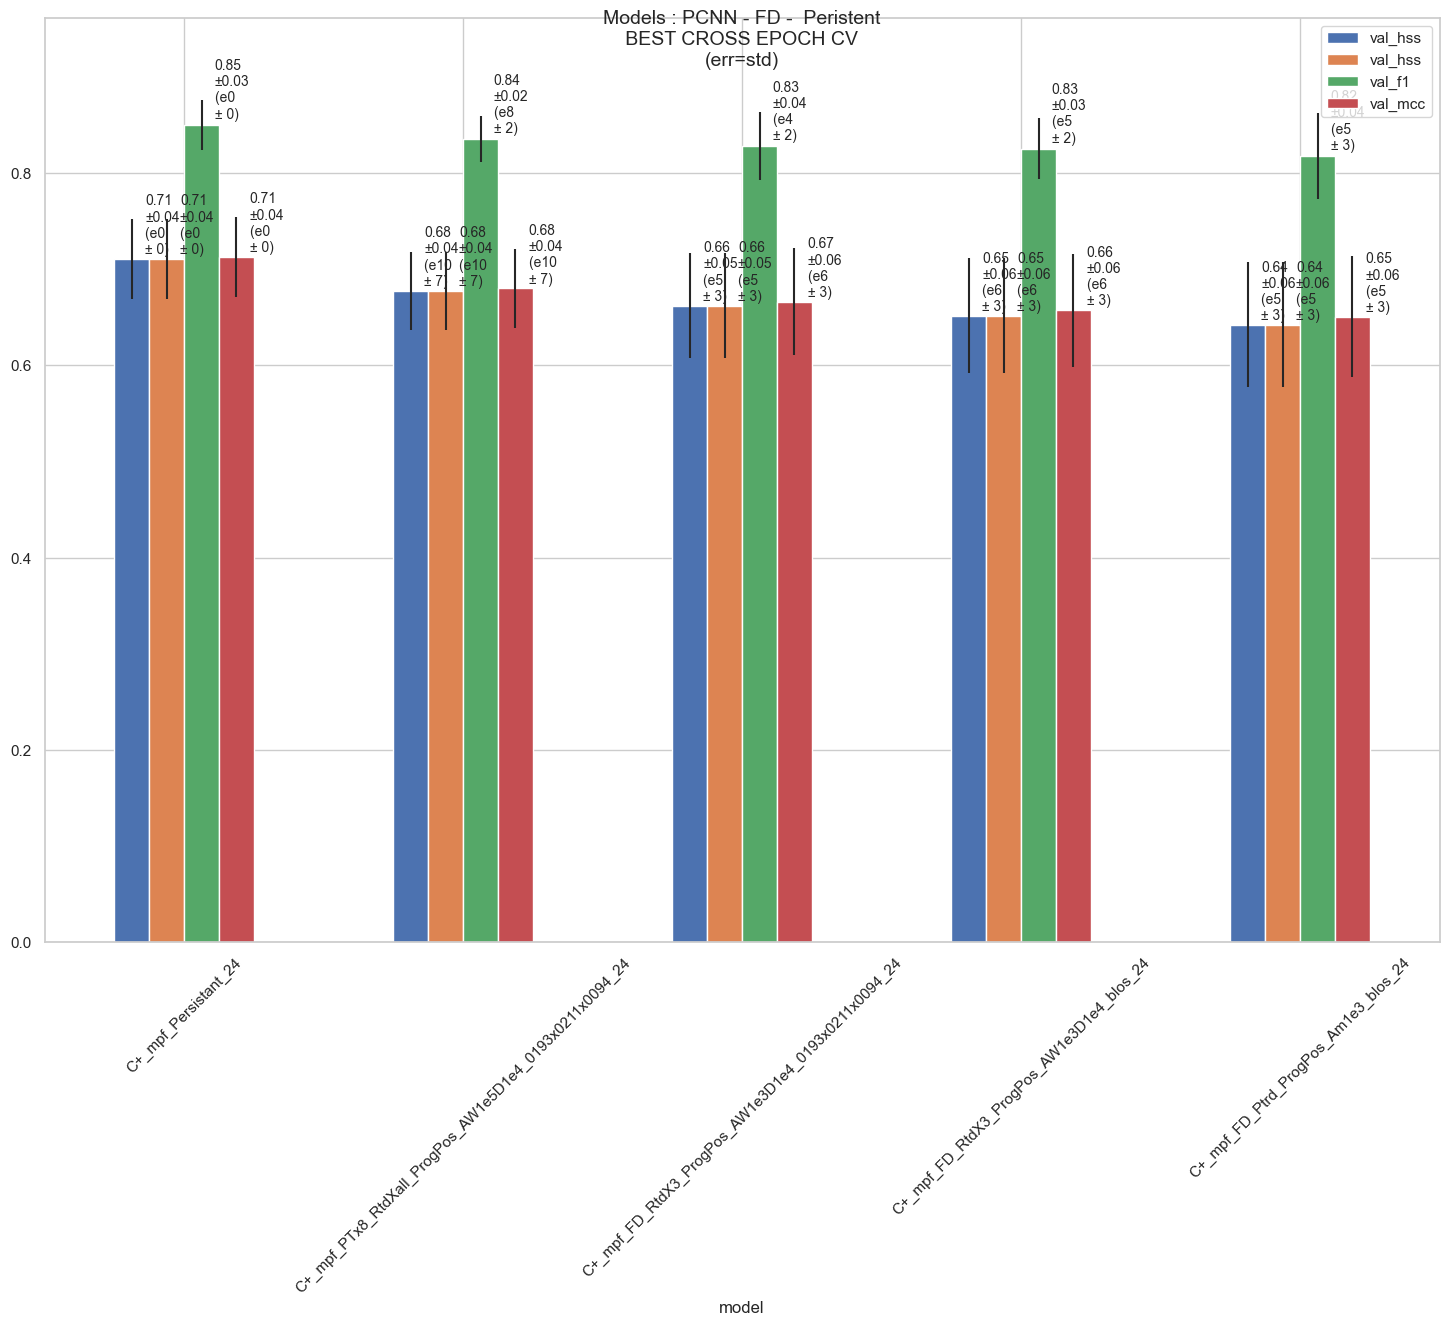

In [36]:
types    = ['C+']
hasCV    = True
metrics  = ['val_hss', 'val_hss','val_f1','val_mcc'] #]
pltBest  = [True     , False,False]
err_type = 'std' # 'std' , 'minmax'
kind     = "bar"
num_top  = 5
archis   = 'PCNN - FD -  Peristent'



tmp = bestCVCrossEpoch.copy()

tmp['type'] = tmp['model'].apply(lambda x: x[:2])
tmp = tmp[tmp['type'].isin(types)]
if num_top is None: num_top = len(tmp)
tmp = tmp[0:num_top]
sub_models = tmp['model'].values

if not hasCV:
  print('No CV')
else:
  if type(num_top)==str: num_top = len(best)
  tmp = tmp.sort_values(by=[metrics[0]], ascending = False).set_index('model')
  models = list(tmp.index)

  if err_type == 'minmax': err_type = ('min','max')
  if type(err_type) in [tuple,list]:
    yerr=[[tmp[metrics[i]+'_'+err_type[0]]-tmp[metrics[i]],tmp[metrics[i]+'_'+err_type[1]]-tmp[metrics[i]]] for i in range(len(metrics))]
    yerr = np.abs(yerr)
  else:
    yerr=[tmp[metrics[i]+'_'+err_type]  for i in range(len(metrics))]
  ax = tmp[metrics].\
        plot(kind=kind,figsize=(18, 12),yerr=yerr)

  for idx,p in enumerate(ax.patches):
    #print(f'{idx: >2} : {p.get_height():.2f}')
    mtcIdx = idx // len(sub_models)
    modIdx = idx % len(sub_models)
    epoch = tmp.loc[sub_models[modIdx]][metrics[mtcIdx]+'_epcs']
    epoch = [int(float(e)) for e in epoch.split('x')]
    epoch = f'{np.round(np.mean(epoch)):.0f} \n± {np.round(np.std(epoch)):.0f}'
    if type(err_type) in [tuple,list]:
      low = tmp.loc[sub_models[modIdx]][metrics[mtcIdx]+'_'+err_type[0]]
      up  = tmp.loc[sub_models[modIdx]][metrics[mtcIdx]+'_'+err_type[1]]
      errstr = f'\n<{low:.2f};\n   {up:.2f}>'
    else:
      std = tmp.loc[sub_models[modIdx]][metrics[mtcIdx]+'_'+err_type]
      errstr = f'\n±{std:.2f}'
    if kind == "barh":
      ax.annotate(f'{p.get_width():.2f} ({epoch})', (p.get_width() * 1.005, p.get_y() + p.get_height()/4))
    elif kind == "bar":
      ax.annotate(f'{p.get_height():.2f}{errstr}\n(e{epoch:0>2})', (p.get_x() + p.get_width()*0.88, p.get_height() * 1.008), fontsize=10)
      #ax.annotate(f'{p.get_height():.2f}\n({epoch})', (p.get_x() * 1.005 - 0.005* (p.get_x() / base - 1), p.get_height() * 1.008), fontsize=12)
  ax.set_ylim((ax.get_ylim()[0],ax.get_ylim()[1]*1.045))
  tmp = tmp.reset_index()
  plt.xticks(rotation=45)
  ypos = 0.94 if hasCV else 0.96
  plt.title(f'Models : {archis}\n BEST CROSS EPOCH CV \n(err={str(err_type)})', y = ypos, fontsize=14) # val_tss_epcs val_tss_epcs


# Validation Curves - Comparison


In [33]:
types    = ['C+']
hasCV    = True
num_top  = 4
err_type = 'std' # # 'std' , 'minmax' (used for cv only)
alpherr  = 0.15
archis   = 'PCNN - FD -  Peristent'

metrics = ['loss'  ,'acc','auc_roc',
           'tss'   ,'f1' ,'hss',
           'recall','precision','far'
           ]

plt.figure(figsize=(19, 26))

num_metrics = len(metrics)
bestmtc = {}
bestepc = {}
for i in range(num_metrics):
  mtc = metrics[i]
  sub_models = [m for m in models if m[:2] in types]
  if num_top is None:
    num_top = len(sub_models)
  else:
    if num_top <= 0:
      num_top = len(sub_models)
  for idx,model in enumerate(sub_models[0:num_top]):
    if idx==0:
      #ax = plt.subplot(int(np.ceil(np.sqrt(num_metrics))), int(np.round(np.sqrt(num_metrics))), i + 1)
      # ax = plt.subplot(int(np.ceil(np.sqrt(num_metrics)))-1, int(np.round(np.sqrt(num_metrics)))+1, i + 1)
      ax = plt.subplot(int(len(metrics)//3), 3, i + 1)
      #ax = plt.subplot(int(np.round(np.sqrt(num_metrics))), int(np.ceil(np.sqrt(num_metrics))), i + 1)
    val = np.array(res[model]['val_'+mtc])
    if len(val[~np.isnan(val)])==0:
      print(f'WARNING : no data for {model} {metrics[i]}')
    else:
      ax.plot(res[model].index, val, label = model)
      if hasCV:
        if err_type == 'minmax': err_type = ('min','max')
        if type(err_type) in [tuple,list]:
          lower = np.array(res[model]['val_'+mtc+'_'+err_type[0]])
          upper = np.array(res[model]['val_'+mtc+'_'+err_type[1]])
          #lower = lower[~np.isnan(lower)]
          #upper = upper[~np.isnan(upper)]
        else:
          #yerr=best[metrics[0]+'_'+err_type], best[metrics[1]+'_'+err_type]
          err = np.array(res[model]['val_'+mtc+'_'+err_type])
          #err = err[~np.isnan(err)]
          lower = val - err
          upper = val + err
        ax.fill_between(
          range(len(val)),
          lower,
          upper,
          alpha=alpherr)
      val = val[~np.isnan(val)]
      if mtc in ['loss','far','mae','mse']:
        if idx==0:
          bestmtc[mtc] = np.min(val)
          bestepc[mtc] = np.argmin(val)
        else:
          if  np.min(val) < bestmtc[mtc]:
            bestmtc[mtc] = np.min(val)
            bestepc[mtc] = np.argmin(val)
        #if idx==num_metrics-1:
        ax.set_title(f'{mtc}\nbest = {bestmtc[mtc]:.2f} at epoch  {bestepc[mtc]}')
      else:
        if idx==0:
          bestmtc[mtc] = np.max(val)
          bestepc[mtc] = np.argmax(val)
        else:
          if  np.max(val) > bestmtc[mtc]:
            bestmtc[mtc] = np.max(val)
            bestepc[mtc] = np.argmax(val)
        #if idx==num_metrics-1:
      if hasCV:
        if err_type == 'minmax': err_type = ('min','max')
        if type(err_type) in [tuple,list]:
          low = res[model]['val_'+mtc+'_'+err_type[0]][bestepc[mtc]]
          up  = res[model]['val_'+mtc+'_'+err_type[1]][bestepc[mtc]]
          extratitle = f' <{low:.2f};{up:.2f}>'
        else:
          std = res[model]['val_'+mtc+'_'+err_type][bestepc[mtc]]
          extratitle = f' ± {std:.2f}'
        extratitle += f' (e{bestepc[mtc]:0>2})'
      else:
        extratitle = f' at epoch  {bestepc[mtc]}'
      ax.set_title(f'{mtc}\nbest = {bestmtc[mtc]:.2f}{extratitle}')
      if i==0:
        ax.legend()
      #plt.axis("off")
extratitle = f'\n(err={str(err_type)})' if hasCV else ''
plt.suptitle(f'Model : {archis}{extratitle}', y = 0.94, fontsize=14)
# plt.suptitle(f'Model : TOTE-regression 24h', y = 0.94, fontsize=14)

Text(0.5, 0.94, 'Model : PCNN - FD -  Peristent\n(err=std)')

<Figure size 1900x2600 with 0 Axes>

# Training Vs Validation Curves

# Model Comparisons

Due to the different compositions between training and validation as well as the penalisation strategies used during training,  
the M+ models exhibits signifiant differences between the training and validation curves patterns.  
The training evaluation take into account the different weights given to the different sub-classes.  
The performance on each sub-class thus do not contribute equally in the training and the validation evaluation,  
resulting in a correlation between the curves less obvious and harder to interpret.  
It is however a natural reslult of using specific composition and penalisation strategies during training,  
while the final evaluation must be evaluated on a set representative of the general case without weights.  
  
The C+ models are not affected as the problem is balanced and the weights/penalisations used do not generate differences,  
between training and evaluation as marked as for the M+ models

Text(0.5, 0.94, 'Train-Val Comparisons\n(err=std)')

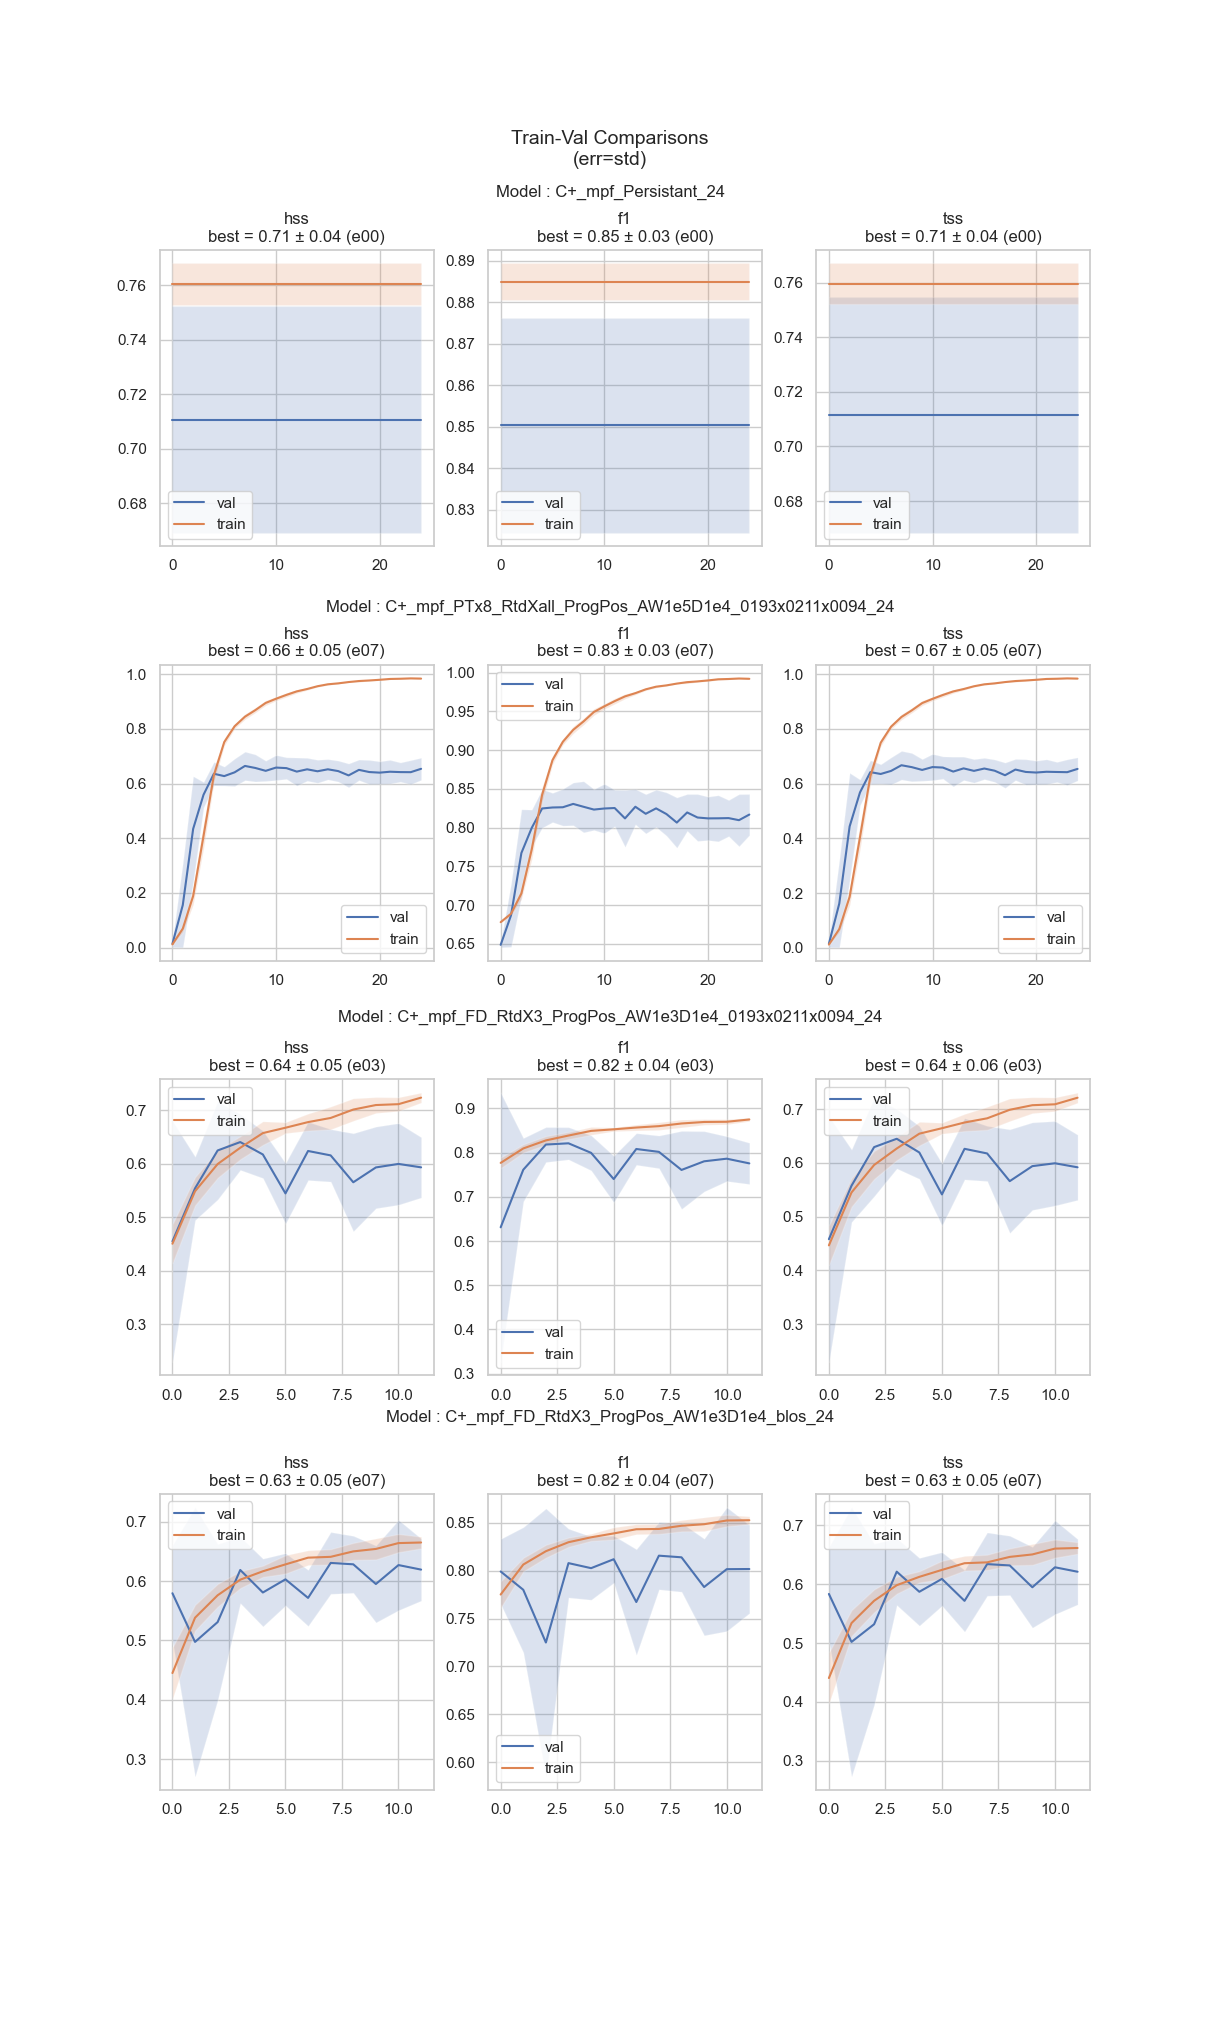

In [31]:
types    = ['C+']
hasCV    = True
num_top  = 4
alpherr  = 0.15
archis   = 'PCNN - FD -  Peristent'

err_type =  'std'# err_type # 'std' , 'minmax' (used for cv only)

plt.rcParams['figure.figsize'] = [12, 20]


metrics = ['hss','f1', 'tss']
  
tmp = best.copy()
if num_top is None: num_top = len(tmp)

sub_models = [m for m in tmp['model'].values if m[:2] in types]
sub_models = sub_models[0:num_top]


num_metrics = len(metrics)

fig, axs = plt.subplots(nrows=num_top, ncols=num_metrics, constrained_layout=False,
                         gridspec_kw={'wspace': 0.2, 'hspace': 0.4})
# fig(figsize=(15, 30))
gridspec = axs[0,0].get_subplotspec().get_gridspec()
subfigs = [fig.add_subfigure(gs) for gs in gridspec]

for j,model in enumerate(sub_models):
  for i in range(num_metrics):
    mtc = metrics[i]
    ax = axs[j,i]
    val = np.array(res[model]['val_'+mtc])
    if len(val[~np.isnan(val)])==0:
      print(f'WARNING : no data for {model} {metrics[i]}')
    else:
      train = np.array(res[model][mtc])
      for idx,curve in enumerate([val, train]):
        preffix = 'val_' if idx==0 else ''
        label   = 'val' if idx==0 else 'train'
        ax.plot(curve, label=label)
        if hasCV:
          if err_type == 'minmax': err_type = ('min','max')
          if type(err_type) in [tuple,list]:
            lower = np.array(res[model][preffix+mtc+'_'+err_type[0]])
            upper = np.array(res[model][preffix+mtc+'_'+err_type[1]])
            #lower = lower[~np.isnan(lower)]
            #upper = upper[~np.isnan(upper)]
          else:
            yerr=tmp[metrics[0]+'_'+err_type], tmp[metrics[1]+'_'+err_type]
            err = np.array(res[model][preffix+mtc+'_'+err_type])
            #err = err[~np.isnan(err)]
            lower = curve - err
            upper = curve + err
          ax.fill_between(
            range(len(curve)),
            lower,
            upper,
            alpha=0.2)
      val = val[~np.isnan(val)]
      if mtc in ['loss','far','mae','mse']:
        bestmtc = np.min(val)
        bestepc = int(np.argmin(val))
      else:
        bestmtc = np.max(val)
        bestepc = int(np.argmax(val))
      if hasCV:
        if err_type == 'minmax': err_type = ('min','max')
        if type(err_type) in [tuple,list]:
          low = res[model]['val_'+mtc+'_'+err_type[0]][bestepc]
          up  = res[model]['val_'+mtc+'_'+err_type[1]][bestepc]
          extratitle = f' <{low:.2f};{up:.2f}>'
        else:
          std = res[model]['val_'+mtc+'_'+err_type][bestepc]
          extratitle = f' ± {std:.2f}'
        extratitle += f' (e{bestepc:0>2})'
      else:
        extratitle = f' at epoch  {bestepc}'
      ax.set_title(f'{mtc}\nbest = {bestmtc:.2f}{extratitle}')
      ax.legend()
      #plt.axis("off")
  extratitle = f'\n(err={str(err_type)})' if hasCV else ''
  
  vShift = np.ones(num_top)
  vShift[0] = 0.65
  vShift[1] = 0.82
  vShift[3] = 1.2
  subfigs[(j)*num_metrics + 1].suptitle(f'Model : {model}', y = vShift[j], fontsize=12)
plt.suptitle(f'Train-Val Comparisons{extratitle}', y = 0.94, fontsize=14)

## Model Zoom

CPU times: user 97.4 ms, sys: 6.48 ms, total: 104 ms
Wall time: 116 ms


Text(0.5, 0.94, 'Model : C+_mpf_PTx8_RtdXall_ProgPos_AW1e5D1e4_0193x0211x0094_24\n(err=std)')

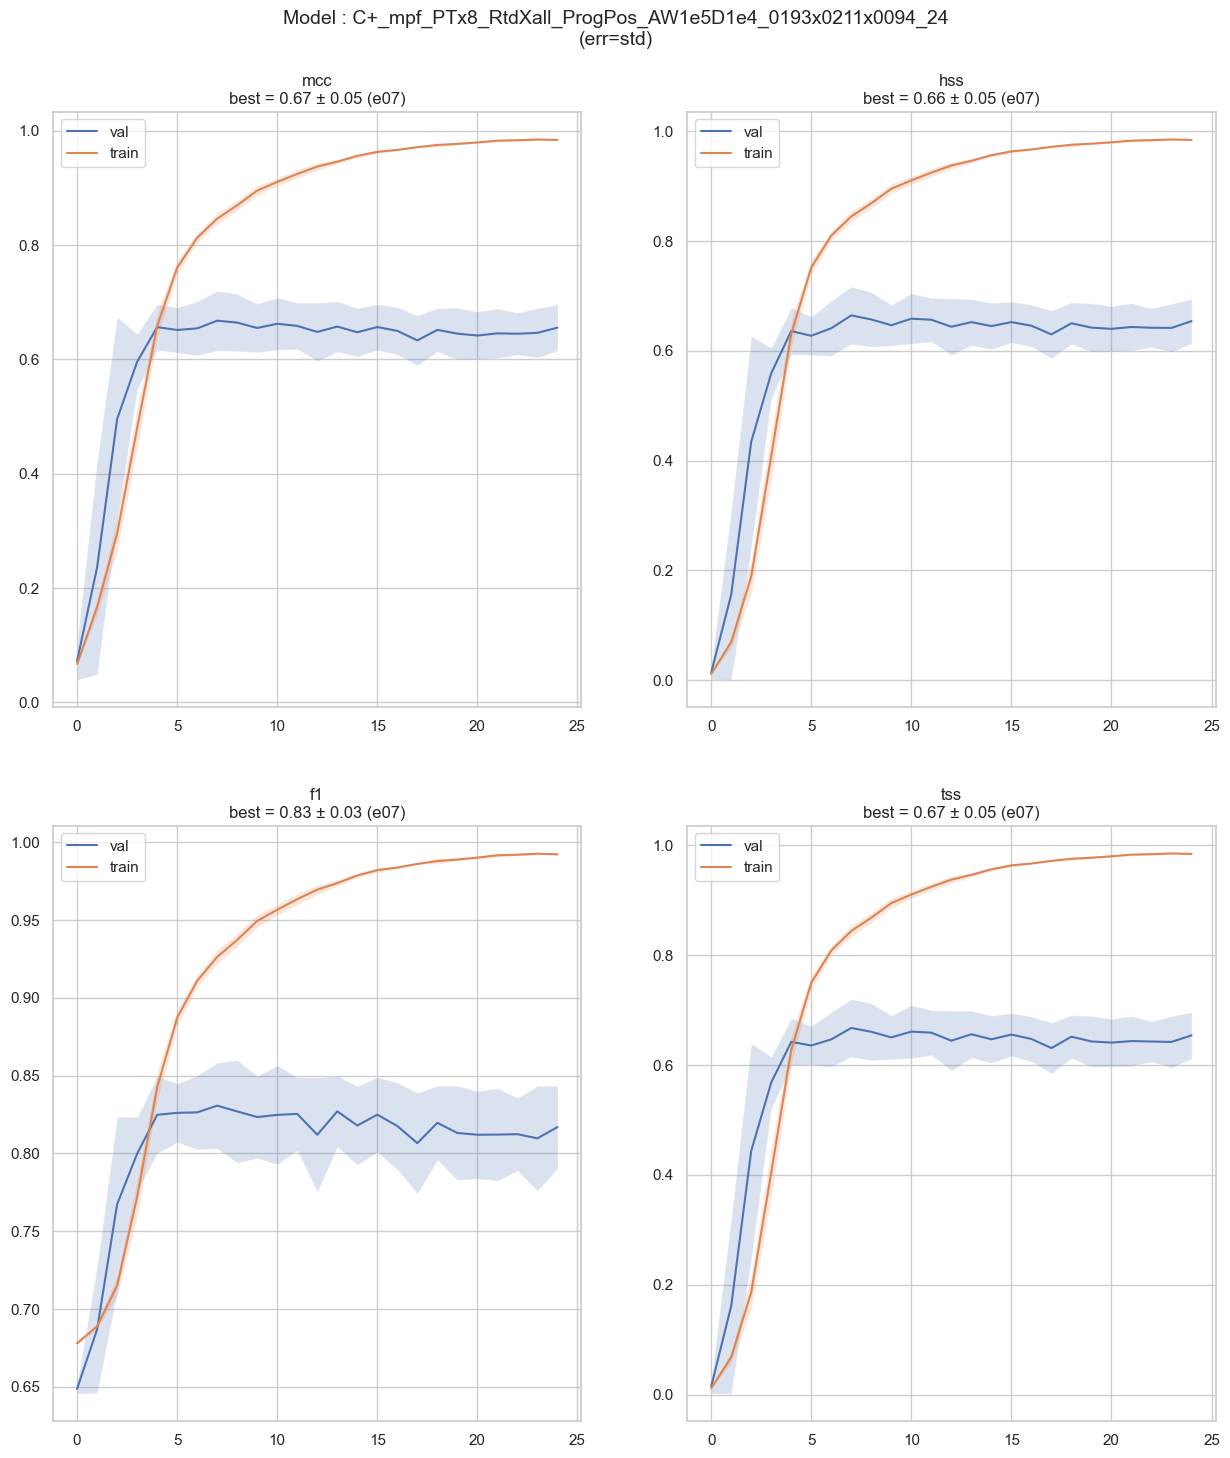

In [32]:
%%time

model =  'best'
# model = 'M+_mpf_PTx8_RtdXall_ProgPos_AW1e5D1e4_0193x0211x0094_24'
# model = 'M+_mpf_PTx8_RtdXall_LowC_AW6e6D1e3_blos_24'

err_type =  'std'# err_type # 'std' , 'minmax' (used for cv only)

plt.figure(figsize=(15, 17))

metrics = ['mcc'  ,'hss','f1', 'tss']
  

if model=='best': 
  model = best.sort_values(by=['val_tss'],ascending=False)['model'].iloc[1] # skiping persistent
num_metrics = len(metrics)
for i in range(num_metrics):
  mtc = metrics[i]
  ax = plt.subplot(int(np.ceil(np.sqrt(num_metrics))), int(np.round(np.sqrt(num_metrics))), i + 1)
  val = np.array(res[model]['val_'+mtc])
  if len(val[~np.isnan(val)])==0:
    print(f'WARNING : no data for {model} {metrics[i]}')
  else:
    train = np.array(res[model][mtc])
    for idx,curve in enumerate([val, train]):
      preffix = 'val_' if idx==0 else ''
      label   = 'val' if idx==0 else 'train'
      ax.plot(curve, label=label)
      if hasCV:
        if err_type == 'minmax': err_type = ('min','max')
        if type(err_type) in [tuple,list]:
          lower = np.array(res[model][preffix+mtc+'_'+err_type[0]])
          upper = np.array(res[model][preffix+mtc+'_'+err_type[1]])
          #lower = lower[~np.isnan(lower)]
          #upper = upper[~np.isnan(upper)]
        else:
          yerr=best[metrics[0]+'_'+err_type], best[metrics[1]+'_'+err_type]
          err = np.array(res[model][preffix+mtc+'_'+err_type])
          #err = err[~np.isnan(err)]
          lower = curve - err
          upper = curve + err
        ax.fill_between(
          range(len(curve)),
          lower,
          upper,
          alpha=0.2)
    val = val[~np.isnan(val)]
    if mtc in ['loss','far','mae','mse']:
      bestmtc = np.min(val)
      bestepc = int(np.argmin(val))
    else:
      bestmtc = np.max(val)
      bestepc = int(np.argmax(val))
    if hasCV:
      if err_type == 'minmax': err_type = ('min','max')
      if type(err_type) in [tuple,list]:
        low = res[model]['val_'+mtc+'_'+err_type[0]][bestepc]
        up  = res[model]['val_'+mtc+'_'+err_type[1]][bestepc]
        extratitle = f' <{low:.2f};{up:.2f}>'
      else:
        std = res[model]['val_'+mtc+'_'+err_type][bestepc]
        extratitle = f' ± {std:.2f}'
      extratitle += f' (e{bestepc:0>2})'
    else:
      extratitle = f' at epoch  {bestepc}'
    ax.set_title(f'{mtc}\nbest = {bestmtc:.2f}{extratitle}')
    ax.legend()
    #plt.axis("off")
extratitle = f'\n(err={str(err_type)})' if hasCV else ''
plt.suptitle(f'Model : {model}{extratitle}', y = 0.94, fontsize=14)